In [4]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size,1)

In [12]:
#스케일 정해주는 법
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data)
# standard_scale = preprocessing.StandardScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

MinMaxScaler(feature_range=(0, 5))


array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [5]:
#train 과 test set 나눠주기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.2)

NameError: name 'x_scaled_data' is not defined

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [17]:
#normal equation module 이용
from sklearn import  linear_model

regr = linear_model.LinearRegression(fit_intercept=True, 
                                     normalize=False, 
                                     copy_X=True, 
                                     n_jobs=8)
regr.fit(X_train, y_train)
regr

LinearRegression(n_jobs=8)

In [17]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-2.05712171  0.99257554  0.1443662   0.93269212 -1.65389402  3.31924013
  -0.14069825 -3.06643334  1.28530264 -1.05326004 -1.93394769  0.61843923
  -3.92161453]]
intercept:  [29.14401333]


In [18]:
regr.predict(x_data[:5])

array([[-67.59035213],
       [-52.81432766],
       [-30.25155557],
       [ -6.77812848],
       [-15.50968392]])

In [23]:
#predict의 기능
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[-67.59035213],
       [-52.81432766],
       [-30.25155557],
       [ -6.77812848],
       [-15.50968392]])

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.6879537289147553, 4.254962067128035, 33.66008724324857)

In [22]:
y_true = y_train
y_hat = regr.predict(X_train)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7483951199274292, 3.0800969405034575, 19.51023615798818)

# Linear Regression - sklearn_lr

- 강의 중 소개된 scikit-learn 에서 제공하는 linear model 에 대해 설명되어 있는 공식 문서 사이트 https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

# Linear Regression with Normal equation

In [13]:
X = df.values
y = boston.target

In [28]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42) 
# random state : 돌릴 때 마다 새로운 난수가 생성돼서 다르게 split 되므로 상수를 지정해서 고정해두는 역할

In [17]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [20]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [21]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

4.552364598463056

In [21]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.967776607137974

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

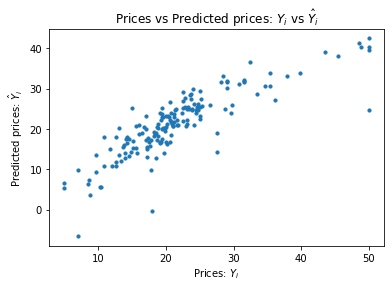

In [23]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [24]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

# Linear Regression with SGD

In [26]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [45]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [47]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [48]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [49]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse
#값 상당히 높게 나옴

(23610772567736.9, 5.574685812453973e+26)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

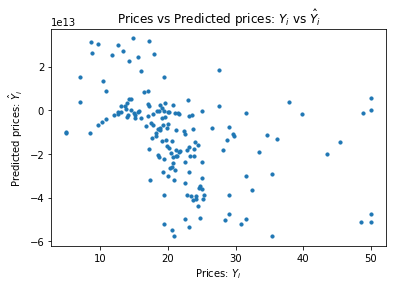

In [50]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# 돌려보면 결과가 중구난방으로 나옴. 데이터의 값들이 서로 격차가 너무 클 경우 어떠한 최적값을 찾아내지 못한 케이스
# 스케일링한 X를 가지고 학습을 하면 됨.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [52]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [53]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [54]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.607246695121491, 21.2267221097079)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

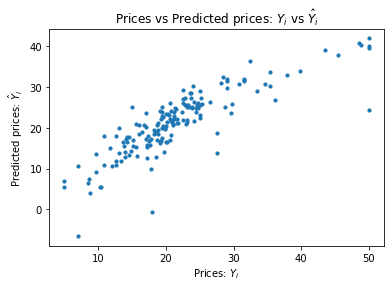

In [55]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# Linear Regression with Ridge & Lasso regression

In [7]:
from sklearn.linear_model import Lasso, Ridge

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [15]:
ridge = Ridge(fit_intercept=True, alpha=0.5) # alpha: 수업에서는 lambda 값으로 배움. 정규화 할 때.
ridge.fit(X_train,y_train)
#lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5)

In [22]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.579058484791166, 20.967776607137974)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

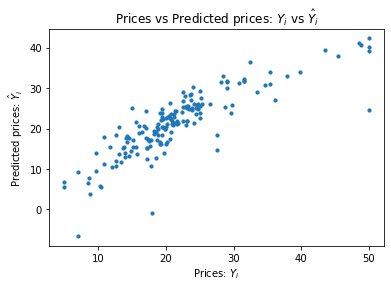

In [23]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [24]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    p = ridge.predict(X_test)
    err = p-y_test
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5529		 5.8757
0.418	 4.5749		 5.8419
0.826	 4.5935		 5.8270
1.234	 4.6074		 5.8186
1.642	 4.6180		 5.8126
2.050	 4.6262		 5.8078
2.458	 4.6327		 5.8034
2.866	 4.6379		 5.7993
3.274	 4.6422		 5.7953
3.682	 4.6458		 5.7912
4.090	 4.6489		 5.7873
4.498	 4.6515		 5.7833
4.906	 4.6538		 5.7793
5.313	 4.6558		 5.7753
5.721	 4.6576		 5.7714
6.129	 4.6593		 5.7674
6.537	 4.6607		 5.7635
6.945	 4.6621		 5.7596
7.353	 4.6633		 5.7557
7.761	 4.6644		 5.7518
8.169	 4.6655		 5.7479
8.577	 4.6665		 5.7441
8.985	 4.6674		 5.7404
9.393	 4.6683		 5.7366
9.801	 4.6691		 5.7329
10.209	 4.6699		 5.7292
10.617	 4.6707		 5.7256
11.025	 4.6714		 5.7220
11.433	 4.6722		 5.7184
11.841	 4.6729		 5.7149
12.249	 4.6735		 5.7114
12.657	 4.6742		 5.7079
13.065	 4.6748		 5.7045
13.473	 4.6755		 5.7011
13.881	 4.6761		 5.6978
14.289	 4.6767		 5.6945
14.697	 4.6773		 5.6912
15.104	 4.6779		 5.6880
15.512	 4.6785		 5.6848
15.920	 4.6791		 5.6816
16.328	 4.6797		 5

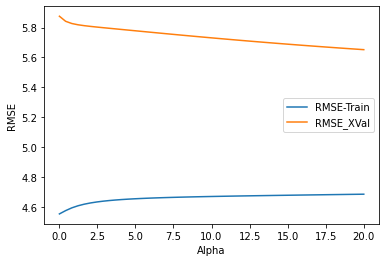

In [25]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

In [29]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: linear regression
RMSE on training: 4.5524
RMSE on 10-fold CV: 5.8770
Method: lasso
RMSE on training: 4.7242
RMSE on 10-fold CV: 5.7637
Method: ridge
RMSE on training: 4.5687
RMSE on 10-fold CV: 5.8487
